<a href="https://colab.research.google.com/github/Onkargaikwad/credit-card/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pylab import rcParams
import math

In [80]:
df=pd.read_csv("creditcard.csv",skipinitialspace=True)

In [81]:
df.shape


(238094, 31)

In [82]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [83]:

df.nunique()

Time      104768
V1        231048
V2        231050
V3        231049
V4        231047
V5        231050
V6        231047
V7        231046
V8        231037
V9        231048
V10       231042
V11       231043
V12       231048
V13       231050
V14       231046
V15       231049
V16       231038
V17       231042
V18       231048
V19       231043
V20       231031
V21       231024
V22       231041
V23       231015
V24       231042
V25       231036
V26       231046
V27       231009
V28       230975
Amount     30548
Class          2
dtype: int64

In [84]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [85]:
df1=df.dropna()

In [86]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [87]:
df1.duplicated().sum()

884

In [88]:
df2=df1.drop_duplicates()

In [89]:
df2.duplicated().sum()

0

In [90]:
df2=df2.drop(['Time'],axis=1)

In [91]:
dataframe=df2.drop(['Class'],axis=1)

In [92]:
df2['Class'].value_counts()

0.0    236796
1.0       413
Name: Class, dtype: int64

In [93]:
X=df2.iloc[:,0:29]
Y=df2.iloc[:,29:30]

In [94]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238088,2.105143,-0.151638,-1.662136,-0.063862,0.685598,0.144740,-0.010315,-0.012778,0.369257,0.241212,...,-0.158423,-0.316148,-0.856429,0.232302,-0.356378,-0.171733,0.211672,-0.082115,-0.074340,1.98
238089,2.083483,-0.864782,-1.018751,-1.621948,-0.485971,-0.232948,-0.721520,-0.020815,2.418724,-0.978856,...,-0.102701,0.203113,0.864978,-0.008787,0.103057,0.093041,-0.055381,0.030362,-0.042047,22.76
238090,2.085616,-0.148144,-1.405123,0.256095,0.171377,-0.787750,0.161279,-0.267736,0.652737,0.079243,...,-0.195101,-0.334171,-0.878842,0.238732,-0.726131,-0.217334,0.242310,-0.077243,-0.065789,16.99
238091,-0.966902,1.031987,1.660153,-0.552914,-0.220336,0.086442,0.048954,0.628243,-0.332405,-1.080778,...,-0.108438,-0.105677,-0.413731,-0.262782,-0.370006,0.339708,-0.413701,-0.052382,-0.000127,5.00


In [95]:
Y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
238088,0.0
238089,0.0
238090,0.0
238091,0.0


Text(0.5, 1.0, 'Class')

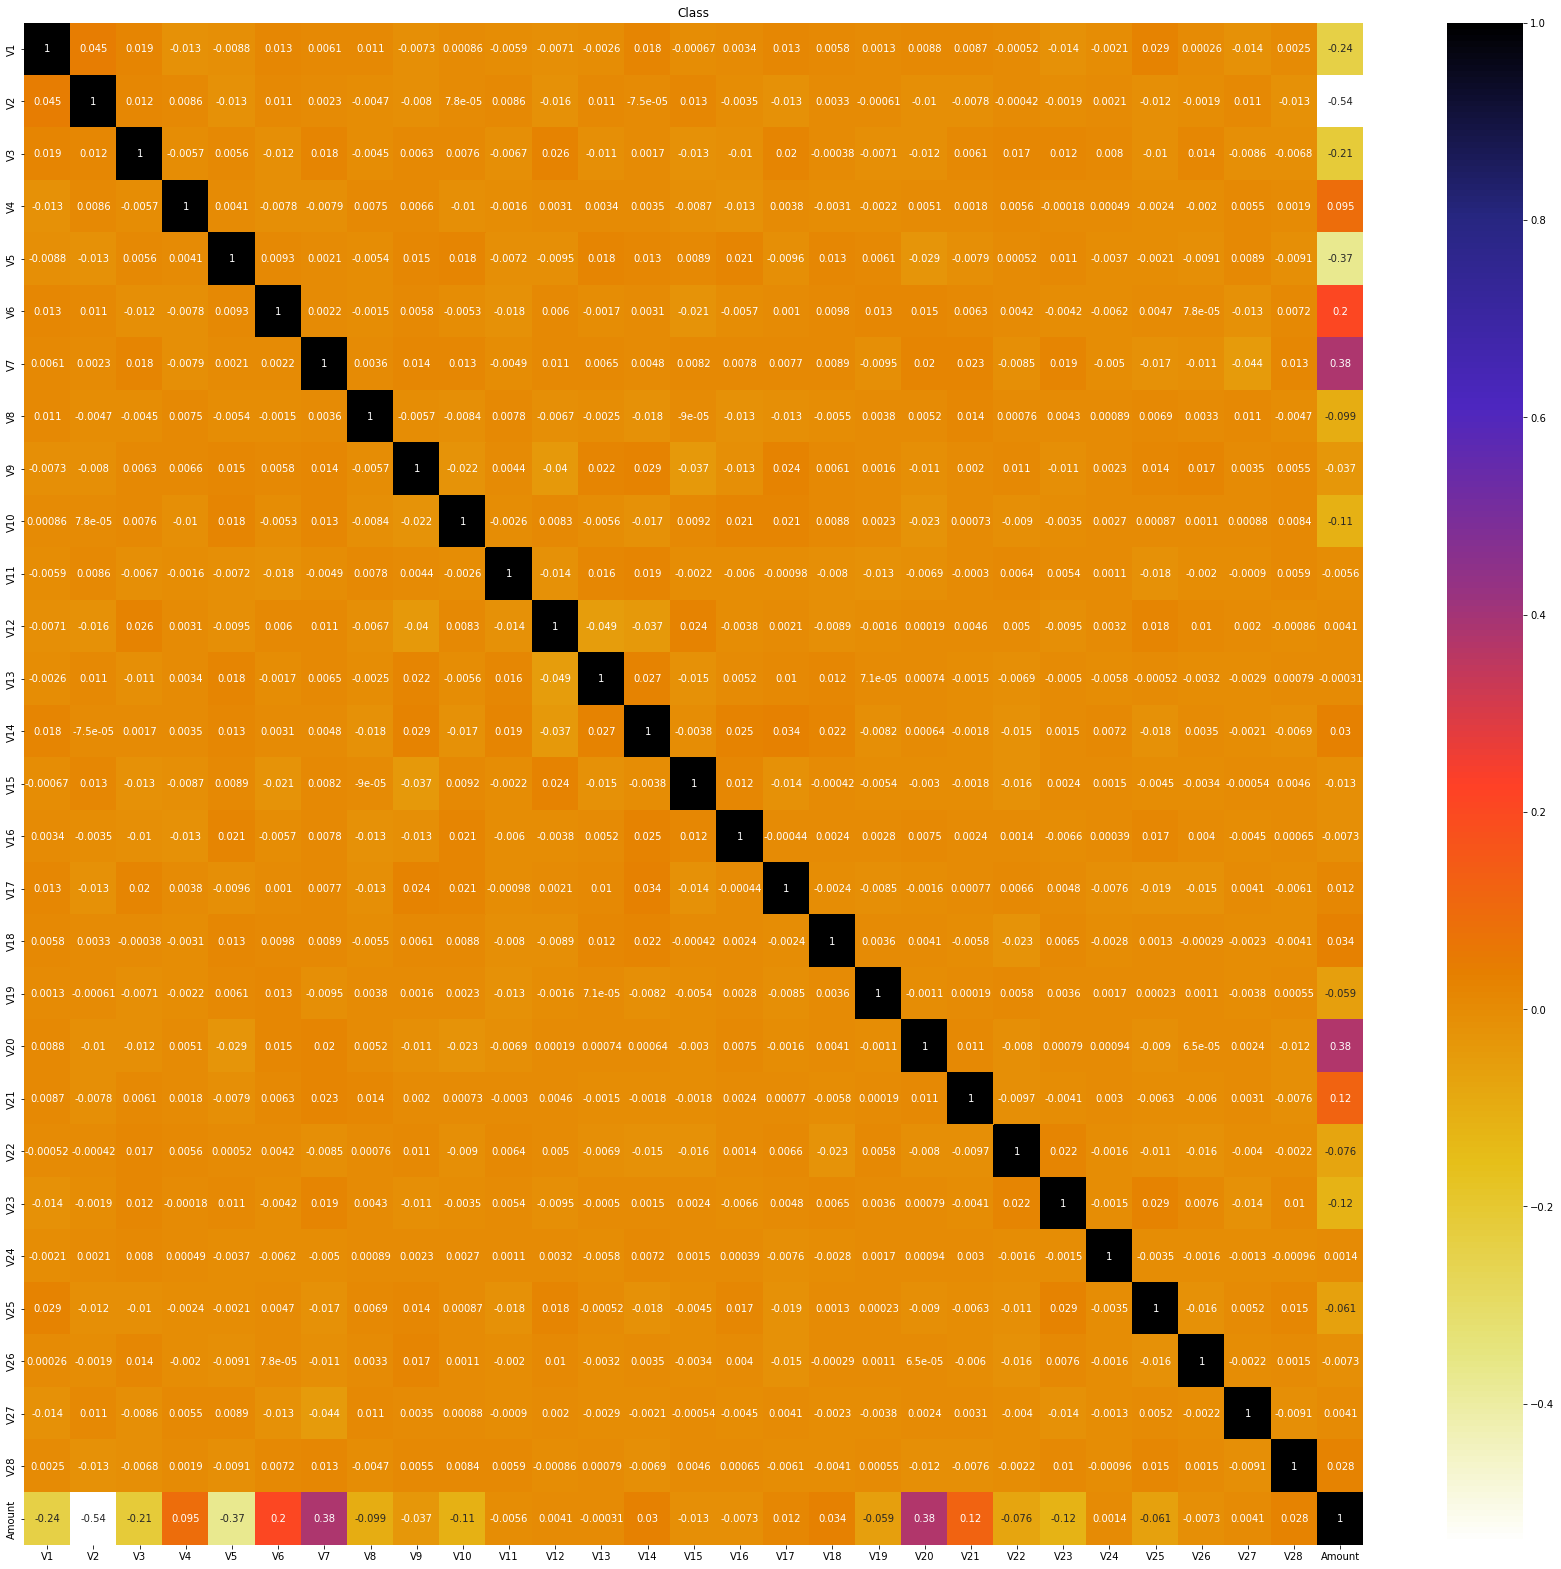

In [96]:
correlation=dataframe.corr()
plt.figure(figsize=(30,28))
sns.heatmap(dataframe.corr(),annot =True,cmap=plt.cm.CMRmap_r)
plt.title('Class') 

In [97]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataframe, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [98]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

0

In [99]:
####handling imbalanced data 
!pip install imblearn

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
# Implementing Oversampling for Handling Imbalanced 
oversample = SMOTE()

x,y = oversample.fit_resample(X,Y)

In [102]:
x.shape,y.shape

((473592, 29), (473592, 1))

In [103]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((331514, 29), (142078, 29), (331514, 1), (142078, 1))

In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
classification_report(y_test,y_pred)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[69814,  1182],
       [ 4343, 66739]])

In [108]:
accuracy_score(y_test,y_pred)


0.9611129098101043

In [77]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')
#Train the model using the training sets
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9880516344979903
confusion matrix: [[36279   217]
 [  654 35747]]
